In [1]:
import yfinance as yf
import numpy as np

In [2]:
df = yf.download("^NSEI",start='2010-01-01')
# df = yf.download("AAPL",start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300
2023-04-12,17759.550781,17825.750000,17717.250000,17812.400391,17812.400391,232800


In [4]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [5]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [6]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in df['Lag_'+str(i)]]
        names.append('Lag_'+str(i)+'_dir')
    return names

In [7]:
dirname = lagit(df,5)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,Lag_3,Lag_3_dir,Lag_4,Lag_4_dir,Lag_5,Lag_5_dir
Date,,,,,,,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.008696,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.000739,1,0.008696,1,NaN,-1,NaN,-1,NaN,-1,NaN,-1
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.003547,-1,0.000739,1,0.008696,1,NaN,-1,NaN,-1,NaN,-1
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.003493,-1,-0.003547,-1,0.000739,1,0.008696,1,NaN,-1,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,17634.900391,17694.099609,17597.949219,17624.050781,17624.050781,254800,0.001414,1,0.002395,1,0.009097,1,0.002204,1,0.016205,1,0.007581,1
2023-04-11,17704.800781,17748.750000,17655.150391,17722.300781,17722.300781,304300,0.005559,1,0.001414,1,0.002395,1,0.009097,1,0.002204,1,0.016205,1
2023-04-12,17759.550781,17825.750000,17717.250000,17812.400391,17812.400391,232800,0.005071,1,0.005559,1,0.001414,1,0.002395,1,0.009097,1,0.002204,1


In [9]:
df.dropna(inplace=True)

In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
model = LogisticRegression()

In [12]:
model.fit(df[dirname],df['direction'])

LogisticRegression()

In [13]:
df['prediction_Logit'] = model.predict(df[dirname])

In [14]:
df['prediction_Logit']

Date
2010-01-12    1
2010-01-13   -1
2010-01-14    1
2010-01-15    1
2010-01-18    1
             ..
2023-04-10    1
2023-04-11    1
2023-04-12    1
2023-04-13    1
2023-04-17    1
Name: prediction_Logit, Length: 3253, dtype: int64

In [15]:
df['strat_Logit'] = df['prediction_Logit'] * df['returns']

In [16]:
np.exp(df[['returns','strat_Logit']].sum())

returns        3.373119
strat_Logit    3.514117
dtype: float64

<AxesSubplot: xlabel='Date'>

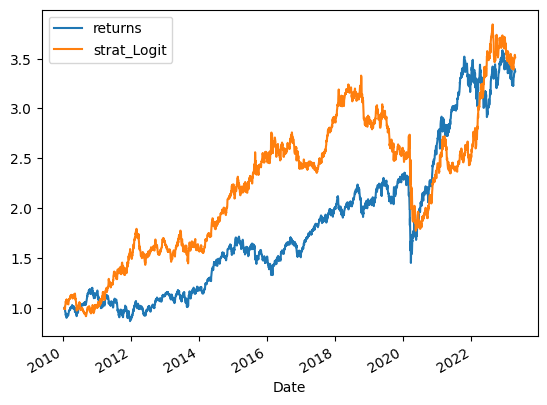

In [17]:
np.exp(df[['returns','strat_Logit']].cumsum()).plot()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test = train_test_split(df,shuffle=False,test_size=0.25,random_state=0)

In [20]:
train = train.copy()

In [21]:
test = test.copy()

In [22]:
model = LogisticRegression()

In [23]:
model.fit(train[dirname],train['direction'])

LogisticRegression()

In [24]:
test['prediction_Logit'] = model.predict(test[dirname])

In [25]:
test['strat_Logit'] = test['prediction_Logit'] * test['returns']

In [26]:
np.exp(test[['returns','strat_Logit']].sum())

returns        1.441668
strat_Logit    1.029229
dtype: float64

<AxesSubplot: xlabel='Date'>

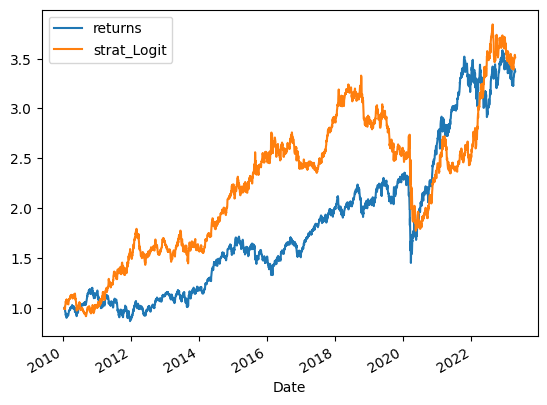

In [27]:
np.exp(df[['returns','strat_Logit']].cumsum()).plot()

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(test['direction'],test['prediction_Logit'])

array([[ 93, 281],
       [ 97, 343]], dtype=int64)

In [30]:
print(classification_report(test['direction'],test['prediction_Logit']))

              precision    recall  f1-score   support

          -1       0.49      0.25      0.33       374
           1       0.55      0.78      0.64       440

    accuracy                           0.54       814
   macro avg       0.52      0.51      0.49       814
weighted avg       0.52      0.54      0.50       814

